# Comparando os Algoritmos

Cada sistema contém linhas de montagem.

Cada linha de montagem contém estações, um custo de entrada e um custo de saída.

Cada estação tem um custo e contém transições pra próxima estação das linhas adjacentes.

Cada transição tem um custo.

Os custos serão aleatórios, mas com valores inteiros entre 1 e 1000.

A quantidade de estações será incrementada gradualmente.

In [1]:
from solver import IterativeSystem3, RecursiveSystem3

## Montando os sistemas de 3 linhas com custos aleatórios

In [2]:
from random import randint

upper_limit = 10000

def set_up_systems_for_n_stations(n: int) -> tuple[RecursiveSystem3, IterativeSystem3]:
	assembly_line_1 = [randint(1, upper_limit) for _ in range(n)]
	assembly_line_2 = [randint(1, upper_limit) for _ in range(n)]
	assembly_line_3 = [randint(1, upper_limit) for _ in range(n)]

	entries = [randint(1, upper_limit) for _ in range(3)]
	stations = [assembly_line_1, assembly_line_2, assembly_line_3]
	transitions_1_2 = [[randint(1, upper_limit) for _ in range(n - 1)],
	                   [randint(1, upper_limit) for _ in range(n - 1)],
	                   []]
	transitions_2_3 = [[],
	                   [randint(1, upper_limit) for _ in range(n - 1)],
	                   [randint(1, upper_limit) for _ in range(n - 1)]]
	exits = [randint(1, upper_limit) for _ in range(3)]

	recursive_system = RecursiveSystem3(entries, stations, transitions_1_2, transitions_2_3, exits)
	iterative_system = IterativeSystem3(entries, stations, transitions_1_2, transitions_2_3, exits)

	return (recursive_system, iterative_system)

#### Exemplo de uso

In [3]:
(recursive_system, iterative_system) = set_up_systems_for_n_stations(n=4)  # n stations per assembly line

### A função que mede a duração de uma chamada de função

A função `time_it` chama a função passada como argumento e mede a duração da chamada.

Ela também retorna o valor da chamada mensurada.

**Nota:** Acabei não usando esse retorno, mas a ideia era mostrar como o retorno era o mesmo nos dois algoritmos, dadas as mesmas entradas.

In [4]:
from time import time
from typing import TypeVar, Callable


T = TypeVar('T')


def time_it(function: Callable[[], T]) -> tuple[float, T]:
	t_0 = time()
	return_value = function()
	delta_t = time() - t_0

	return (delta_t, return_value)

#### Exemplo de uso

In [5]:
(recursive_algorithm_duration, recursive_optimal_time) = time_it(recursive_system.get_optimal_time)
(iterative_algorithm_duration, iterative_optimal_time) = time_it(iterative_system.get_optimal_time)

## Experimentos

Pra cada tamanho de entrada $n$, os algoritmos tentarão achar a solução ótima $m$ vezes. O tempo de execução de um algoritmo será a média dessas $m$ durações das computações da solução ótima.

A solução ótima consiste do tempo ótimo e do caminho que leva a esse tempo ótimo.

**Nota:** A função que faz isso se chama `get_optimal_time`, mas além do melhor tempo, ela também retorna o melhor caminho.

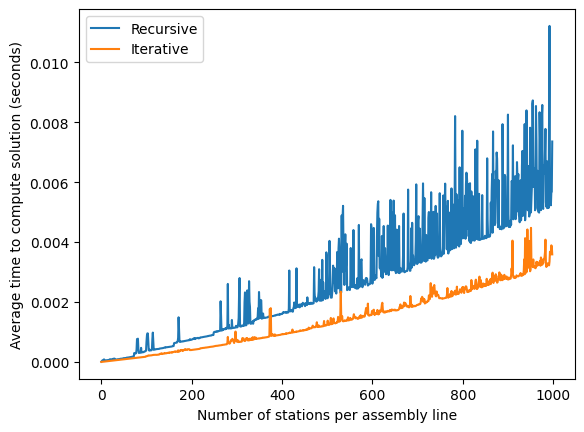

In [12]:
import matplotlib.pyplot as plt
from statistics import fmean

m = 50

plt.ylabel('Average time to compute solution (seconds)')
plt.xlabel('Number of stations per assembly line')
plt.plot([fmean([time_it(set_up_systems_for_n_stations(n)[0].get_optimal_time)[0] for _ in range(m)]) for n in range(1, 1000)], label='Recursive')
plt.plot([fmean([time_it(set_up_systems_for_n_stations(n)[-1].get_optimal_time)[0] for _ in range(m)]) for n in range(1, 1000)], label='Iterative')
plt.legend()
plt.show()

#### Como ler a lista gerada

`fmean(...)` = Média dos...

`[time_it(...)[0] for _ in range(m)]` = ...tempos de execução de ... $m$ vezes

`set_up_systems_for_n_stations(n)[0].get_optimal_time` = solução ótima pro algoritmo recursivo

`set_up_systems_for_n_stations(n)[-1].get_optimal_time` = solução ótima pro algoritmo iterativo

Ou seja,

``` py
fmean([time_it(set_up_systems_for_n_stations(n)[0].get_optimal_time)[0] for _ in range(m)]) for n in range(1, 1000)
```

significa:
> Média dos tempos gastos pra se computar a solução ótima $m$ vezes, pra $n$ de 1 a 1000


## Conclusão

Geralmente o algoritmo iterativo é mais eficiente, e também é muito mais suave.

Ser suave contribui em se ter uma ideia melhor de quanto tempo vai demorar pra calcular a solução ótima, pois há menos variações.
Assim, o comportamento do algoritmo recursivo é mais previsível.

Outro ponto importante é que dependendo do tamanho de $n$, o algoritmo recursivo atinge o limite máximo de recursão e a computação é abortada.

O algoritmo iterativo é melhor.